### Stpe0: Import library and Setting
- Import necessary library
- download NLTK resources

In [ ]:
import numpy as np
import pandas as pd

# data splitting 
from sklearn.model_selection import train_test_split

# text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# classifiers algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# dimensionality reduction
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import StandardScaler

## models evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rlgns\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rlgns\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rlgns\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Step 1: Data Loading and Preprocessing
- Load the dataset
- Split into training and test sets
- Explore the data distribution
- Apply text preprocessing (optional: remove stopwords, lowercase, etc.)

#### Step1-1: Declarethe  preporecessing function
- lowercase
- remove puntuation
- tokenization
- remove stopwords and short word(bleow 2)
- lemmatization
    - we can consider between stemming and lemmatization, but, we choose lemmatization since it preserves the correct base form and reduces smantic distortion more than stemming
- **Why we didnt use POS tagging?**
    - In this project we used TF-IDF, but TF-IDF models don't benefit much from part of sppech information and we think id adds unnecessary complexity.


In [30]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower() ## convert to lowercase
    text = re.sub(r"[^\w\s]", " ", text) # remove punctuation
    tokens = word_tokenize(text) # tokenize
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2] # remove stopwords and short words
    tokens = [lemmatizer.lemmatize(w) for w in tokens] # lemmatization

    return " ".join(tokens)

#### Step1-2: Load dataset and apply preprocessing'
- load dataset and rename the columns name like "text" and "label"
    - data url: https://www.kaggle.com/datasets/ahmedabdulhamid/reviews-dataset
- remove duplicate to avoid biased training

In [31]:
df = pd.read_csv("data/TestReviews.csv")
df = df.rename(columns={"review": "text", "class": "label"})

print("Original dataset")
display(df)

print(df["label"].value_counts())

# Apply preprocessing
df["text_clean"] = df["text"].apply(preprocess_text)

# Remove duplicates
df = df.drop_duplicates(subset="text_clean").reset_index(drop=True)
print("After removing duplicates and preprocessing")
display(df)

Original dataset


,text,label
0,Fantastic spot for an even or a quite cocktail...,1
1,"Love, love, love the calamari. It's so good an...",1
2,"Love this place. Stiff martinis and cocktails,...",1
3,It's everything a great cocktail bar should be...,1
4,"I came here before a pirates game, so it was a...",1
...,...,...
4316,My wife and I caught this show at the Golden N...,0
4317,This was the dumbest show we have ever seen. ...,0
4318,My girlfriend and I went to this show. It was ...,0
4319,The restrooms looked like after an bombardment...,0


label
1    2989
0    1332
Name: count, dtype: int64
After removing duplicates and preprocessing


,text,label,text_clean
0,Fantastic spot for an even or a quite cocktail...,1,fantastic spot even quite cocktail swell host ...
1,"Love, love, love the calamari. It's so good an...",1,love love love calamari good spicy endless lis...
2,"Love this place. Stiff martinis and cocktails,...",1,love place stiff martini cocktail cheap drink ...
3,It's everything a great cocktail bar should be...,1,everything great cocktail bar great location a...
4,"I came here before a pirates game, so it was a...",1,came pirate game around 30ish evening gotten l...
...,...,...,...
4141,My girlfriend and I got the tickets for free.....,0,girlfriend got ticket free thank god cuz le 10...
4142,My wife and I are late 30s-early 40s and did n...,0,wife late 30 early 40 find particularly funny ...
4143,My wife and I caught this show at the Golden N...,0,wife caught show golden nugget heard good thin...
4144,This was the dumbest show we have ever seen. ...,0,dumbest show ever seen never laughed minute re...


#### Step 1.3: Explore the Data Distribution
We briefly analyze the dataset to understand class balance and text characteristics:
- Label counts and percentages(total:4146)
    - 1: 69%(2862)
    - 0: 31%(1284)
- Review length distribution  
- sample reviews  

In [32]:
label_counts = df["label"].value_counts()
print("1. Label counts")
print(f"{label_counts}")

label_percent = df["label"].value_counts(normalize=True) * 100
print("2. Label percentage")
print(label_percent.round(2))

df["text_length"] = df["text_clean"].apply(lambda x: len(str(x).split()))
print("3. review length statistics")
print(df["text_length"].describe())

print("4. sample cleaned reviews")
for i in range(3):
    print(f"- {df['text_clean'].iloc[i][:50]}")


1. Label counts
label
1    2862
0    1284
Name: count, dtype: int64
2. Label percentage
label
1    69.03
0    30.97
Name: proportion, dtype: float64
3. review length statistics
count    4146.000000
mean       60.866860
std        53.997727
min         0.000000
25%        25.000000
50%        45.000000
75%        79.000000
max       426.000000
Name: text_length, dtype: float64
4. sample cleaned reviews
- fantastic spot even quite cocktail swell host yelp
- love love love calamari good spicy endless list ma
- love place stiff martini cocktail cheap drink good


### Step1.4: Split data

In [33]:
X = df["text_clean"]
y = df["label"]

# for stratified splitting,it is to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 3109
Test size: 1037


### Step 2: TF-IDF Feature Extraction
- Convert text documents into numerical TF-IDF features
- Understand how TF-IDF weights terms by importance
- Examine the vocabulary size and sample features
- Visualize the TF-IDF matrix structure

In [34]:
tfidf = TfidfVectorizer(max_features=5000) # limit to top 5000 features in reviews

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape


(3109, 5000)

In [35]:
def evaluate_model(y_true, y_pred):
    confusionMatrix = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("Confusion Matrix:")
    print(confusionMatrix)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}, confusionMatrix


In [36]:
def plot_confusion_matrices(confusionMatrix,title):
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.show()

### Step 3: Baseline Model - Naive Bayes with TF-IDF
**YOU WILL IMPLEMENT:**

- Train a Naive Bayes classifier on the TF-IDF features
- Make predictions on the test set
- Create and visualize a confusion matrix to analyze:
    - True Positives (TP)
    - True Negatives (TN)
    - False Positives (FP)
    - False Negatives (FN)
- Calculate accuracy, precision, recall, and F1-score
- Interpret the results: What types of errors is the model making?

Accuracy : 0.8737
Precision: 0.8478
Recall   : 0.9958
F1-score : 0.9159
Confusion Matrix:
[[193 128]
 [  3 713]]


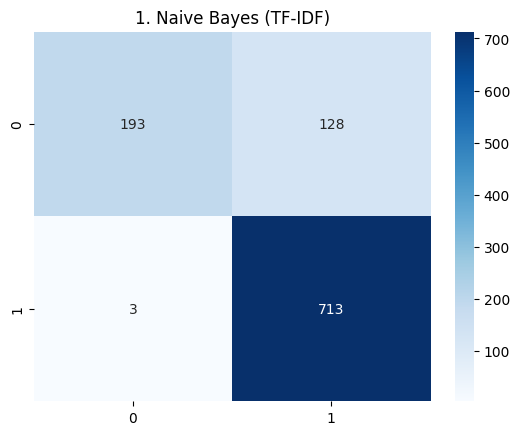

In [ ]:
naivBayes = MultinomialNB()
# train the model through TF-IDF features
naivBayes.fit(X_train_tfidf, y_train)

# predict on test set and store predictions
y_prediction_nb = naivBayes.predict(X_test_tfidf)

metrics_nb, confusion_metrix_nb = evaluate_model(y_test, y_prediction_nb)
plot_confusion_matrices(confusion_metrix_nb,"1. Naive Bayes (TF-IDF)")


### Step 4: Dimensionality Reduction with SVD
- Apply Truncated SVD (Latent Semantic Analysis) to reduce TF-IDF dimensions
- Reduce from ~500-5000 features to 50-100 components
- Visualize the explained variance ratio
- Explain in your markdowns how SVD captures semantic relationships in text, and what it means for your data.


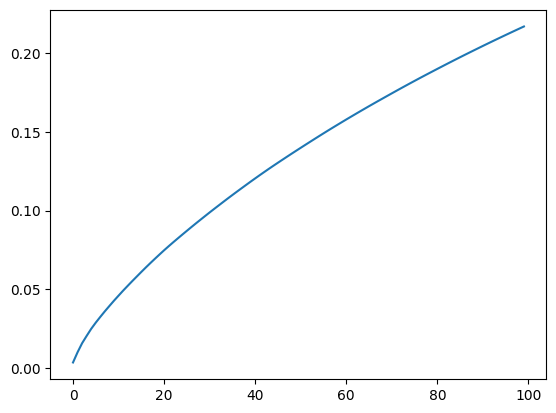

In [38]:
# Dimensionality Reduction using SVD and 5000 to 100
svd = TruncatedSVD(n_components=100, random_state=42)

X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd  = svd.transform(X_test_tfidf)

# visualize explained variance
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.show()


### Step 5: Model Training - Logistic Regression with SVD
**YOU WILL IMPLEMENT:**

- Train a Logistic Regression classifier on SVD-reduced features
- Make predictions on the test set
- Create and visualize a confusion matrix for the SVD model
- Compare performance with the baseline Naive Bayes model
- Analyze: Did dimensionality reduction help or hurt performance?
- Discuss on the markdowns: How does reducing dimensions affect model accuracy and speed?


Accuracy : 0.8852
Precision: 0.8699
Recall   : 0.9804
F1-score : 0.9219
Confusion Matrix:
[[216 105]
 [ 14 702]]


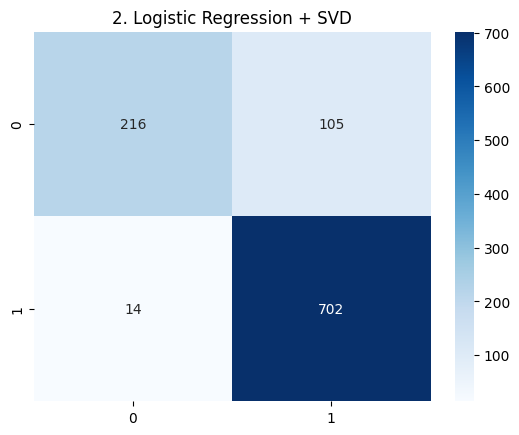

In [ ]:
logistic_regression_svd = LogisticRegression(max_iter=1000) # limit to 1000 iterations: this helps in convergence
logistic_regression_svd.fit(X_train_svd, y_train)

y_prediction_svd = logistic_regression_svd.predict(X_test_svd)

metrics_svd, confussion_metrix_svd = evaluate_model(y_test, y_prediction_svd)
plot_confusion_matrices(confussion_metrix_svd,"2.Logistic Regression + SVD")


### Step 6: Dimensionality Reduction with PCA
- Apply Principal Component Analysis (PCA) to the TF-IDF features
- First standardize the data (required for PCA)
- Reduce to the same number of components as SVD for fair comparison
- Compare PCA vs SVD variance curves


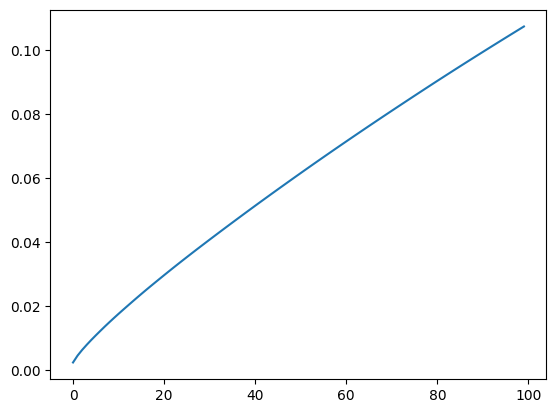

In [ ]:
#흠 이해 잘안감
# covert sparse matrix(TF-IDF) to dense
X_train_dense = X_train_tfidf.toarray()
X_test_dense  = X_test_tfidf.toarray()

# scalar 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dense)
X_test_scaled  = scaler.transform(X_test_dense)

# Dimensionality Reduction using PCA and 5000 to 100
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()


### Step 7: Model Training - Logistic Regression with PCA
**YOU WILL IMPLEMENT:**

- Train a Logistic Regression classifier on PCA-reduced features
- Make predictions on the test set
- Create and visualize a confusion matrix for the PCA model
- Compare performance with both previous models
- Analyze: Which dimensionality reduction technique works better for text data?


Accuracy : 0.9094
Precision: 0.9147
Recall   : 0.9581
F1-score : 0.9359
Confusion Matrix:
[[257  64]
 [ 30 686]]


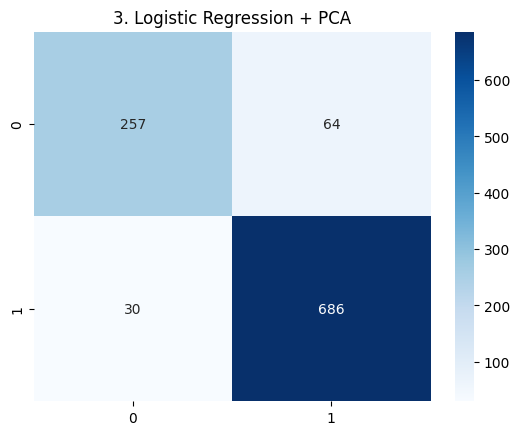

In [ ]:
logistic_regression_pca = LogisticRegression(max_iter=1000)
logistic_regression_pca.fit(X_train_pca, y_train)

y_pred_pca = logistic_regression_pca.predict(X_test_pca)

metrics_pca, cofusion_metrix_pca = evaluate_model(y_test, y_pred_pca)
plot_confusion_matrices(cofusion_metrix_pca,"3. Logistic Regression + PCA")


### Step 8: Visual Comparison
- Visualize all three confusion matrices side-by-side

In [42]:
model_comparison_result = pd.DataFrame([
    {"Model": "NB + TF-IDF", **metrics_nb},
    {"Model": "LR + SVD",    **metrics_svd},
    {"Model": "LR + PCA",    **metrics_pca},
])

model_comparison_result


,Model,accuracy,precision,recall,f1
0,NB + TF-IDF,0.873674,0.847800,0.995810,0.915864
1,LR + SVD,0.885246,0.869888,0.980447,0.921865
2,LR + PCA,0.909354,0.914667,0.958101,0.935880


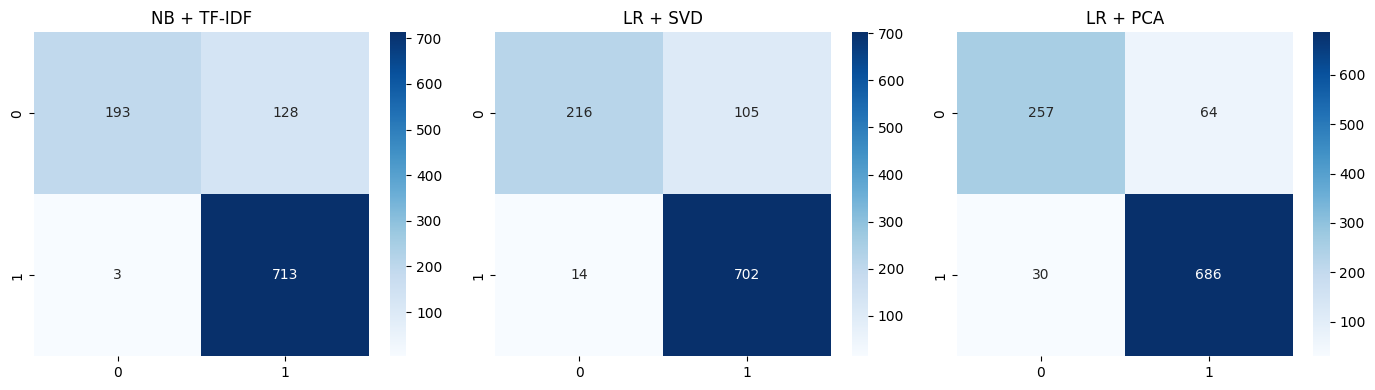

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
cms = [confusion_metrix_nb, confussion_metrix_svd, cofusion_metrix_pca]
titles = ["NB + TF-IDF", "LR + SVD", "LR + PCA"]

for ax, confusionMatrix, title in zip(axes, cms, titles):
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()
